# Analyze Text of England and Wales Judgements


In [1]:
import os
import json
import string
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_ = '/home/stirunag/work/github/ML4-legal-documents/judgements_xml/'
jsonl_file = path_+'england_wales_data_refined_7.jsonl'
dataset_path = path_+'en_judgements_dataset'

In [3]:
# data = []
# with open(jsonl_file, 'r') as file:
#     for line in file:
#         data.append(json.loads(line))

# dataset = Dataset.from_json(jsonl_file)
# dataset_dict = DatasetDict({"train": dataset})

# # Save the dataset to disk
# dataset.save_to_disk(dataset_path)


Saving the dataset (0/1 shards):   0%|          | 0/6154 [00:00<?, ? examples/s]

In [6]:
# deduplicate the dataset

dataset_pd = pd.read_json(jsonl_file, lines=True)
dataset_pd.head()


,_id,citation,signature,date,publicationDate,type,excerpt,content,judges,caseNumbers,citation_references,legislation,file_name,appeal_type,appeal_outcome,xml_uri,uri
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,[2008] EWCA Crim 2952,EWCA_Crim_2952,NaT,2008-11-26,crown_court,No. 2008/03296/A9 2008/03350/A9 & 2008/03349/A...,No.\n2008/03296/A9\n2008/03350/A9\n&\n2008/033...,"[LORD JUSTICE TOULSON, MR JUSTICE MADDISON]","[2008/03296/A9, 2008/03349/A9, 2008/03350/A9]",None,None,2008_11_26-1736.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,[2006] EWCA Crim 3187,EWCA_Crim_3187,NaT,2006-12-19,supreme_court,Neutral Citation Number: [2006] EWCA Crim 3187...,Neutral Citation Number:\n[2006] EWCA Crim 318...,"[LORD JUSTICE PILL, MR JUSTICE HODGE]",[2003/06451/C4],None,None,2006_12_19-996.xml,conviction,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,[2012] EWCA Crim 1840,EWCA_Crim_1840,NaT,2012-08-08,crown_court,Neutral Citation Number: [2012] EWCA Crim 1840...,Neutral Citation Number:\n[2012] EWCA Crim 184...,"[LORD JUSTICE DAVIS, MR JUSTICE BURTON, MR JUS...",[201106042D2],"[[2008] UKHL 28, [2008] UKHL 29]","[that Act, Section 95(1), s.95(1), s.97, s.76(...",2012_08_08-3035.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,[2014] EWCA Crim 1730,EWCA_Crim_1730,NaT,2014-07-08,crown_court,Neutral Citation Number: [2014] EWCA Crim 1730...,Neutral Citation Number:\n[2014] EWCA Crim 173...,"[LORD JUSTICE TREACY, MR JUSTICE GRIFFITH WILL...",[201300932 C3],None,None,2014_07_08-3443.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,[2018] EWCA Crim 2189,EWCA_Crim_2189,NaT,2018-07-26,crown_court,No: 201802356 A2 Neutral Citation Number: [201...,No:\n201802356 A2\nNeutral Citation Number:\n[...,"[LORD JUSTICE SIMON, MRS JUSTICE CARR DBE]",[201802356 A2],None,None,2018_07_26-4369.xml,None,allowed,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...


In [8]:
null_values = dataset_pd.isnull().sum()
print(null_values)

_id                       0
citation                  0
signature                 0
date                   6154
publicationDate           0
type                      0
excerpt                  96
content                   0
judges                   39
caseNumbers            1220
citation_references    4762
legislation            4328
file_name                 0
appeal_type            5320
appeal_outcome         4786
xml_uri                   0
uri                       0
dtype: int64


In [28]:
# Remove the specified columns: date, caseNumbers, citation_references, legislation, appeal_type, appeal_outcome.
# Rename the publicationDate column to Date.
# Remove rows where excerpt or judges columns have null values.

columns_to_drop = ['date', 'caseNumbers', 'citation_references', 'legislation', 'appeal_type', 'appeal_outcome']
df_cleaned = dataset_pd.drop(columns=columns_to_drop)

# 2. Rename 'publicationDate' to 'Date'
df_cleaned.rename(columns={'publicationDate': 'date'}, inplace=True)

# 3. Remove rows where 'excerpt' or 'judges' columns have null values
df_final = df_cleaned.dropna(subset=['excerpt', 'judges'])

df_final

,_id,citation,signature,date,type,excerpt,content,judges,file_name,xml_uri,uri
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,[2008] EWCA Crim 2952,EWCA_Crim_2952,2008-11-26,crown_court,No. 2008/03296/A9 2008/03350/A9 & 2008/03349/A...,No.\n2008/03296/A9\n2008/03350/A9\n&\n2008/033...,"[LORD JUSTICE TOULSON, MR JUSTICE MADDISON]",2008_11_26-1736.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,[2006] EWCA Crim 3187,EWCA_Crim_3187,2006-12-19,supreme_court,Neutral Citation Number: [2006] EWCA Crim 3187...,Neutral Citation Number:\n[2006] EWCA Crim 318...,"[LORD JUSTICE PILL, MR JUSTICE HODGE]",2006_12_19-996.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,[2012] EWCA Crim 1840,EWCA_Crim_1840,2012-08-08,crown_court,Neutral Citation Number: [2012] EWCA Crim 1840...,Neutral Citation Number:\n[2012] EWCA Crim 184...,"[LORD JUSTICE DAVIS, MR JUSTICE BURTON, MR JUS...",2012_08_08-3035.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,[2014] EWCA Crim 1730,EWCA_Crim_1730,2014-07-08,crown_court,Neutral Citation Number: [2014] EWCA Crim 1730...,Neutral Citation Number:\n[2014] EWCA Crim 173...,"[LORD JUSTICE TREACY, MR JUSTICE GRIFFITH WILL...",2014_07_08-3443.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,[2018] EWCA Crim 2189,EWCA_Crim_2189,2018-07-26,crown_court,No: 201802356 A2 Neutral Citation Number: [201...,No:\n201802356 A2\nNeutral Citation Number:\n[...,"[LORD JUSTICE SIMON, MRS JUSTICE CARR DBE]",2018_07_26-4369.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
...,...,...,...,...,...,...,...,...,...,...,...
6149,13032b4b7419ea7c4164d1966f32bc0dff781ea559a1c5...,[2018] EWCA Crim 2743,EWCA_Crim_2743,2018-12-10,crown_court,Neutral Citation Number: [2018] EWCA Crim 2743...,Neutral Citation Number:\n[2018] EWCA Crim 274...,"[LADY JUSTICE MACUR, MR JUSTICE JULIAN KNOWLES...",2018_12_10-4457.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
6150,902f5071f90c0edce10f75a23f1011d344c2b678bd589e...,[2004] EWCA Crim 7,EWCA_Crim_7,2004-01-21,supreme_court,Case No: 2002/04091/D1 Neutral Citation Number...,Case No:\n2002/04091/D1\nNeutral Citation Numb...,"[LORD JUSTICE RIX, MR JUSTICE McCOMBE]",2004_01_21-173.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
6151,616a841e06e7cd2ccc3821e65bcc24bd5d4cd70d4bcb6a...,[2010] EWCA Crim 2144,EWCA_Crim_2144,2010-09-02,crown_court,Neutral Citation Number: [2010] EWCA Crim 2144...,Neutral Citation Number:\n[2010] EWCA Crim 214...,"[LORD JUSTICE ELIAS, MR JUSTICE SIMON]",2010_09_02-2495.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
6152,a04c535e3f6c151606dc132c1e28a4a339bfe07ef56990...,[2005] EWCA Crim 859,EWCA_Crim_859,2005-04-06,crown_court,Case No: 200305991 D2 Neutral Citation Number:...,Case No:\n200305991 D2\nNeutral Citation Numbe...,"[LORD JUSTICE ROSE, MR JUSTICE BODEY, MR JUSTI...",2005_04_06-481.xml,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...


In [29]:
null_values = df_final.isnull().sum()
print(null_values)

_id          0
citation     0
signature    0
date         0
type         0
excerpt      0
content      0
judges       0
file_name    0
xml_uri      0
uri          0
dtype: int64


In [31]:
dataset = Dataset.from_pandas(df_final)

# Create a DatasetDict with the Dataset assigned to the 'train' split
dataset_dict = DatasetDict({"train": dataset})

# Save the dataset to disk
dataset.save_to_disk(dataset_path)

Saving the dataset (0/1 shards):   0%|          | 0/6050 [00:00<?, ? examples/s]

In [32]:
from huggingface_hub import login, HfApi, HfFolder
import os
login()


In [33]:
# Push the dataset to the Hugging Face Hub
dataset.push_to_hub("JuDDGES/en-court-raw")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/9.44k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/JuDDGES/en-court-raw/commit/0b42ca56c5c0176e79ea1db950bd8cccdd56837b', commit_message='Upload dataset', commit_description='', oid='0b42ca56c5c0176e79ea1db950bd8cccdd56837b', pr_url=None, pr_revision=None, pr_num=None)

In [15]:
# Load the dataset from disk
ds = load_from_disk(dataset_path)

In [16]:
# | eval: false
def tagger(item):
    text = item["content"]
    dummy_tokens = text.split()

    item["chars"] = len(text)
    item["num_dummy_tokens"] = len(dummy_tokens)
    item["num_non_ws_tokens"] = sum(
        1 for tok in dummy_tokens if any(char not in string.punctuation for char in tok.strip())
    )

    return item


ds = ds.map(tagger, num_proc=8)
ds.cleanup_cache_files()

Map (num_proc=8):   0%|          | 0/6050 [00:00<?, ? examples/s]

0

In [19]:
# | eval: false
stats = (
    ds.select_columns(["_id", "type", "chars", "num_dummy_tokens", "num_non_ws_tokens"]) #"appeal_type", "appeal_outcome"
    .to_pandas()
    .convert_dtypes(dtype_backend="pyarrow")
)
stats["type"] = stats["type"].astype("category")
stats.head()

,_id,type,chars,num_dummy_tokens,num_non_ws_tokens
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,crown_court,12444,2229,2155
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,supreme_court,20977,3681,3586
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,crown_court,40570,7199,7097
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,crown_court,19459,3515,3432
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,crown_court,10352,1879,1793


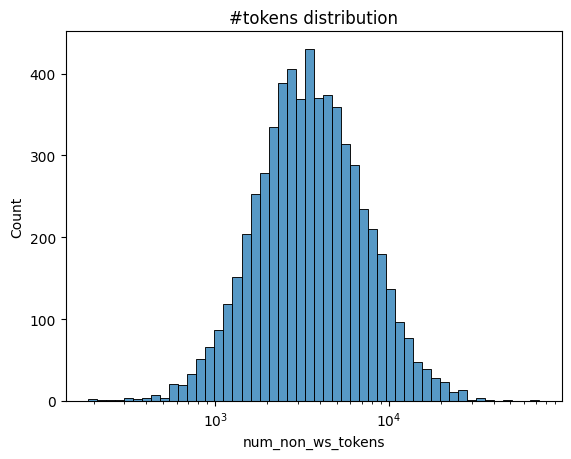

In [20]:
# | eval: false
ax = sns.histplot(
    x=stats["num_non_ws_tokens"],
    log_scale=True,
    bins=50,
)
ax.set(title="#tokens distribution")

# Save the plot as a PNG file in the 'images' folder
plt.savefig('images/tokens_distribution.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

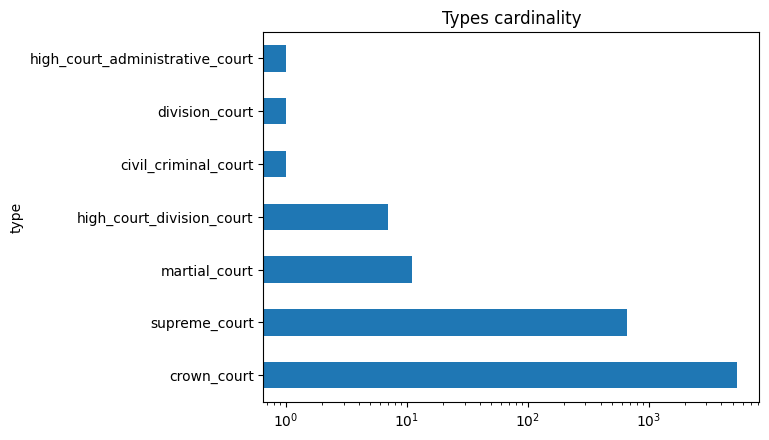

In [21]:
# | eval: false
court_type_card_order = stats["type"].value_counts().index.tolist()
court_type_data = stats["type"].value_counts().plot.barh(logx=True, title="Types cardinality")

# Save the plot as a PNG file in the 'images' folder
plt.savefig('images/cardinality.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [22]:
# # | eval: false
# appeal_type_card_order = stats["appeal_type"].value_counts().index.tolist()
# appeal_type_data = stats["appeal_type"].value_counts().plot.barh(logx=True, title="Types cardinality")

# # Save the plot as a PNG file in the 'images' folder
# plt.savefig('images/cardinality_sc.png', format='png', dpi=300, bbox_inches='tight')

# plt.show()

In [23]:
# # | eval: false
# appeal_outcome_card_order = stats["appeal_outcome"].value_counts().index.tolist()
# appeal_outcome_data = stats["appeal_outcome"].value_counts().plot.barh(logx=True, title="Types cardinality")

# # Save the plot as a PNG file in the 'images' folder
# plt.savefig('images/cardinality_appeal.png', format='png', dpi=300, bbox_inches='tight')

# plt.show()

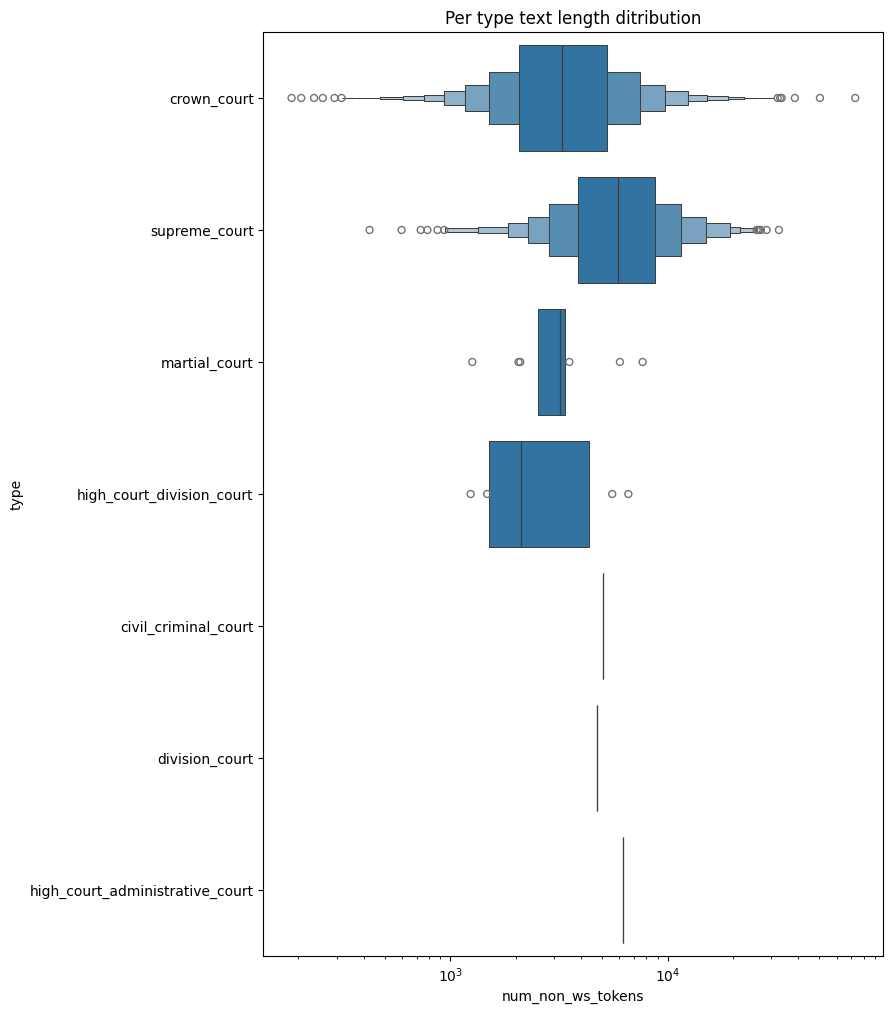

In [24]:
# | eval: false
# sns.displot(data=stats, x="num_non_ws_tokens", col="type", col_wrap=3, log_scale=(True, False), facet_kws=dict(sharey=False, sharex=False), kind="hist", bins=25)

_, ax = plt.subplots(figsize=(8, 12))
ax.set(title="Per type text length ditribution")
sns.boxenplot(data=stats, y="type", x="num_non_ws_tokens", order=court_type_card_order, log_scale=True)

# Save the plot as a PNG file in the 'images' folder
plt.savefig('images/tok_distribution.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [26]:
# # | eval: false
# # sns.displot(data=stats, x="num_non_ws_tokens", col="type", col_wrap=3, log_scale=(True, False), facet_kws=dict(sharey=False, sharex=False), kind="hist", bins=25)

# _, ax = plt.subplots(figsize=(8, 12))
# ax.set(title="Per type text length ditribution")
# sns.boxenplot(data=stats, y="appeal_type", x="num_non_ws_tokens", order=appeal_type_card_order, log_scale=True)

In [27]:
# # | eval: false
# # sns.displot(data=stats, x="num_non_ws_tokens", col="type", col_wrap=3, log_scale=(True, False), facet_kws=dict(sharey=False, sharex=False), kind="hist", bins=25)

# _, ax = plt.subplots(figsize=(8, 12))
# ax.set(title="Per type text length ditribution")
# sns.boxenplot(data=stats, y="appeal_outcome", x="num_non_ws_tokens", order=appeal_outcome_card_order, log_scale=True)

# # Save the plot as a PNG file in the 'images' folder
# plt.savefig('images/tok_distribution_appeal.png', format='png', dpi=300, bbox_inches='tight')

# plt.show()

# Tokenize


In [32]:
# | eval: false
from transformers import AutoTokenizer

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [33]:
# | eval: false
tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-large")
ds = ds.map(
    lambda examples: tokenizer(examples["content"], padding=False, truncation=False),
    batched=True,
    num_proc=44,
)

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Map (num_proc=44):   0%|          | 0/6154 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1625 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (7729 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (4093 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (968 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2180 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

In [34]:
# | eval: false
tokenized = []
for item in ds:
    tokenized.append({"num_tokens": len(item["input_ids"])})

In [48]:
num_tokens = [item['num_tokens'] for item in tokenized]
filtered_tokens = [token for token in num_tokens if token <= 40000]

<Axes: ylabel='Count'>

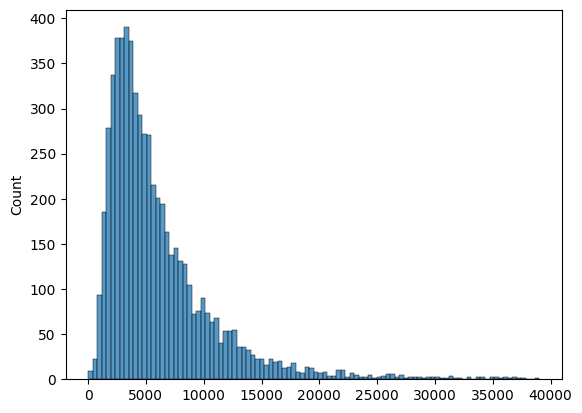

In [49]:
# | eval: false
sns.histplot(filtered_tokens, bins=100)

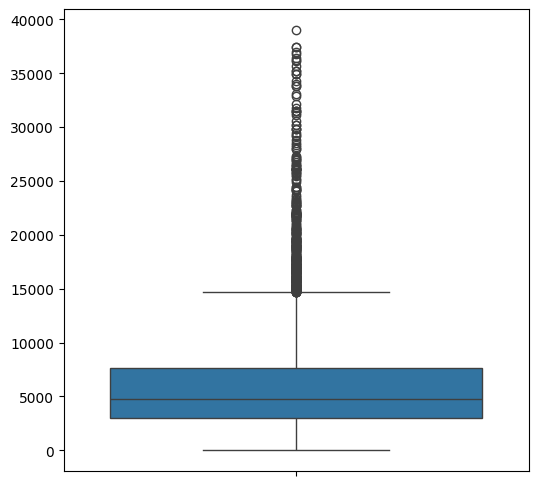

In [50]:
# Plot the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(filtered_tokens)
plt.show()